In [1]:
import os
import sys
# import importlib

In [2]:
import pysteps
import xrValidation
from xrValidation import *
import dask
import xarray as xr
from matplotlib.gridspec import GridSpec
%reload_ext autoreload
%autoreload 2

C:\Users\u0168535\.conda\envs\pysteps_val\Lib\site-packages\pyproj\__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


Pysteps configuration file found at: C:\Users\u0168535\pysteps\pystepsrc



Set up basic parameters

In [3]:
# Directories
data_path = "C:/Workdir/Develop/pysteps/pystepsval/data"
# pysteps_path = os.path.join(data_path,"cases")
# inca_path = os.path.join(data_path,"inca")
vali_path = os.path.join(data_path,"validation")
os.makedirs(vali_path,exist_ok=True)

dataset = "nwc" #"fct","nwc"

# path for saving plots
path_to_save = "C:/Workdir/Develop/pysteps/pystepsval/data/plots"
vali_path_plot = os.path.join(path_to_save,f"case19_{dataset}/")
os.makedirs(vali_path_plot,exist_ok=True)

# # Case 
ncase = 19
# tarfname = find_tarball(pysteps_path,ncase)
# filenames = get_filenames(tarfname)
# tarball = tarfile.open(tarfname,"r")

num_dpi = 300

Read all the pySTEPS-BE nowcasts in this case without loading all the data in memory

In [4]:
# nwc = [read_netcdf(filename,tarball) for filename in filenames]
# # Concatenate all the nowcasts into one xarray
# nwc = xr.concat([ds.swap_dims({"time":"leadtime"}) for ds in nwc],"startdate")
# nwc

Read the radar data for the corresponding validtimes (radar files are in hdf-format so they are automatically loaded).

Load the validation results

In [8]:
pysteps_det = xr.open_dataset(os.path.join(vali_path,f"{ncase}_pysteps_det_{dataset}.nc")) # pySTEPS-BE deterministic scores
# inca_det = xr.open_dataset(os.path.join(vali_path,f"{ncase}_inca_det.nc")).drop_vars("surface") # INCA-BE (ALARO) deterministic scores
pysteps_prob = xr.open_dataset(os.path.join(vali_path,f"{ncase}_pysteps_prob_{dataset}.nc")) # pySTEPS-BE probabilistic scores
# inca_prob = xr.open_dataset(os.path.join(vali_path,f"{ncase}_inca_prob.nc")).drop_vars("surface") # INCA-BE (ALARO) probabilistic scores
pysteps_cont = xr.open_dataset(os.path.join(vali_path,f"{ncase}_pysteps_cont_{dataset}.nc")) # pySTEPS-BE contingency scores

In [7]:
# fig = plt.figure()
# ax = fig.gca()
# ax.set_xticks(numpy.arange(0, 1, 0.1))
# ax.set_yticks(numpy.arange(0, 1., 0.1))
# plt.scatter(x, y)
# plt.grid()
# plt.show()

# plt.close(fig) 

# plt.rcParams["figure.figsize"] = (20,3)

Lets plot the RMSE as function of validtime (to see the effect of precipitation amount itself)

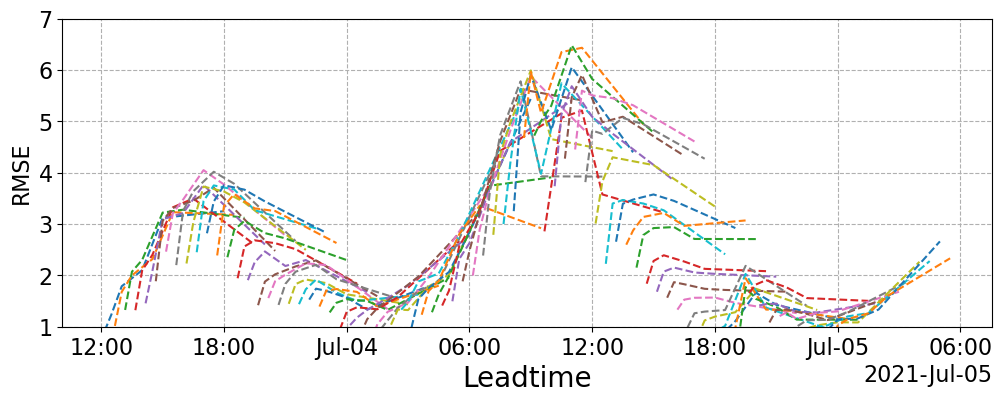

In [10]:
import matplotlib.pyplot as plt
# startdate_slice = slice(0,30,1) # 2 --> every 1h, 4 --> every 2h, 
# startdate_slice = slice(40,52,2) # 2 --> every 1h, 4 --> every 2h, 
# startdate_slice = slice(40,46,2) # 2 --> every 1h, 4 --> every 2h, 
ens_member = 0
metric = "rmse"
# _ = inca_det[metric].isel(startdate=startdate_slice).dropna("time").plot(x="validtime",hue="startdate",size=8,aspect=2) # INCA

# _ = pysteps_det[metric].isel(startdate=startdate_slice).mean("ens_number").plot.line("--",x="validtime",hue="startdate",size=4,aspect=3)
_ = pysteps_det[metric].mean("ens_number").plot.line("--",x="validtime",hue="startdate",size=4,aspect=3)
# ax = plt.gca()
# _ = pysteps_det[metric].isel(startdate=startdate_slice,ens_number=10).plot.line("--",x="validtime",hue="startdate",ax=ax) # PYSTEPS ENSEMBLE MEMBER

plt.gca().get_legend().remove()

ax = plt.gca()
ax.set_ylim([1, 7])   
plt.grid(True, linestyle='--')

plt.rc('xtick', labelsize=16) # plt.xticks() or ax.get_xticks()
plt.rc('ytick', labelsize=16)
plt.rc('axes', labelsize=16)

ax.set_ylabel('RMSE',) 
ax.set_xlabel('Leadtime',fontsize = 20.0) 

ax.tick_params(axis='both', which='major', labelsize=16)

plt.savefig((f'{vali_path_plot}{"rmse_time"}.png'), dpi=num_dpi, bbox_inches='tight')


Avereged over the startdates:

In [11]:
# metrics = ["rmse","bias","mape"] # no smape, only mape

# fig = plt.figure(figsize=(16,6))
# startdate_slice = slice(np.datetime64("2021-07-04T08:00:00"),np.datetime64("2021-07-04T13:00:00"))
# # startdate_slice = slice(np.datetime64("2021-07-04T12:00:00"),np.datetime64("2021-07-04T18:00:00"))

# for i,metric in enumerate(metrics):
#     ax = fig.add_subplot(1,3,i+1)
#     _ = pysteps_det.assign({'leadtime':(pysteps_det.leadtime/np.timedelta64(1,"h"))})[metric].sel(startdate=startdate_slice).mean("startdate",skipna=True).isel(ens_number=0).plot(x="leadtime",ax=ax)
#     # _ = inca_det.assign({'leadtime':(inca_det.leadtime/np.timedelta64(1,"h"))})[metric].sel(startdate=startdate_slice).mean("startdate",skipna=True).dropna("time").plot(x="leadtime",ax=ax)


In [12]:
pysteps_det

<xarray.Dataset> Size: 502kB
Dimensions:     (startdate: 72, ens_number: 48, time: 6)
Coordinates:
    validtime   (startdate, time) datetime64[ns] 3kB ...
  * startdate   (startdate) datetime64[ns] 576B 2021-07-03T12:00:00 ... 2021-...
    leadtime    (time) timedelta64[ns] 48B ...
  * ens_number  (ens_number) int64 384B 1 2 3 4 5 6 7 8 ... 42 43 44 45 46 47 48
Dimensions without coordinates: time
Data variables:
    rmse        (startdate, ens_number, time) float64 166kB 0.9217 ... 2.322
    bias        (startdate, ens_number, time) float64 166kB ...
    mape        (startdate, ens_number, time) float64 166kB ...

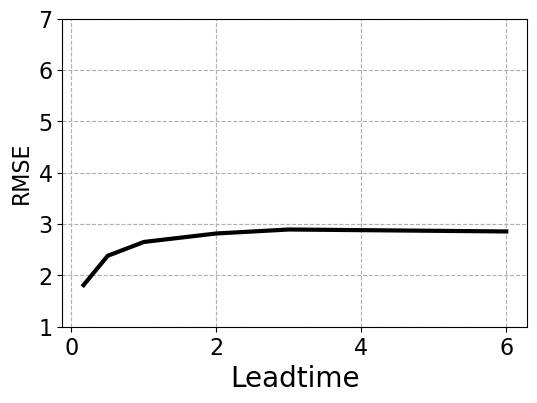

In [14]:
# fig4 = plt.figure(figsize=(10,4))

# startdate_slice = slice(np.datetime64("2021-07-04T08:00:00"),np.datetime64("2021-07-04T13:00:00"))
# ens_number_slice = slice(0,48)

metric = "rmse" 
# _ = pysteps_det.assign({'leadtime':(pysteps_det.leadtime/np.timedelta64(1,"h"))})[metric].sel(startdate=startdate_slice).mean("startdate",skipna=True).sel(ens_number=ens_number_slice).mean("ens_number",skipna=True).plot(x="leadtime", size=4,aspect=1.5,color="k",linewidth=3)
_ = pysteps_det.assign({'leadtime':(pysteps_det.leadtime/np.timedelta64(1,"h"))})[metric].mean("startdate",skipna=True).mean("ens_number",skipna=True).plot(x="leadtime", size=4,aspect=1.5,color="k",linewidth=3)

ax = plt.gca()
ax.set_ylim([1, 7])
# ax.set_xlim([0, 1.1])

ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xlabel('Leadtime', fontsize = 20.0) 
ax.set_ylabel('RMSE',) 
plt.grid(True, linestyle='--')
# plt.show()

plt.savefig((f'{vali_path_plot}{"rmse_leadtime"}.png'), dpi=num_dpi, bbox_inches='tight')

In [13]:
pysteps_prob

<xarray.Dataset> Size: 1GB
Dimensions:               (startdate: 6, threshold: 4, time: 12, rank: 11,
                           forecast_probability: 10, y: 700, x: 700,
                           ens_number: 10)
Coordinates:
    validtime             (startdate, time) datetime64[ns] 576B ...
  * startdate             (startdate) datetime64[ns] 48B 2021-07-04T16:00:00 ...
    leadtime              (time) timedelta64[ns] 96B ...
  * threshold             (threshold) float64 32B 0.1 0.5 1.0 5.0
  * rank                  (rank) float64 88B 1.0 2.0 3.0 4.0 ... 9.0 10.0 11.0
  * forecast_probability  (forecast_probability) float64 80B 0.05 0.15 ... 0.95
    samples               (startdate, threshold, time, forecast_probability) int32 12kB ...
  * x                     (x) float32 3kB 3.005e+05 3.015e+05 ... 9.995e+05
  * y                     (y) float32 3kB 9.995e+05 9.985e+05 ... 3.005e+05
    lon                   (y, x) float64 4MB ...
    lat                   (y, x) float64 4MB ...
  * ens_number            (ens_number) int32 40B 1 2 3 4 5 6 7 8 9 10
Dimensions without coordinates: time
Data variables:
    brier                 (startdate, threshold, time) float64 2kB ...
    crps                  (startdate, time) float64 576B ...
    rhist                 (startdate, threshold, time, rank) int64 25kB ...
    rel                   (startdate, threshold, time, forecast_probability) float64 23kB ...
    thold_bool            (startdate, threshold, time, y, x) float64 1GB ...
    fss                   (startdate, threshold, ens_number, time) float64 23kB ...

Let's check the reliability of the pySTEPS-BE nowcast

In [15]:
# leadtimes = np.array([10,30,60]) 
leadtimes = np.array([10,30,60,120,180,360])
# leadtimes = np.arange(5,65,5)
leadtimes = [np.timedelta64(i,"m") for i in leadtimes]
leadtimes

[numpy.timedelta64(10,'m'),
 numpy.timedelta64(30,'m'),
 numpy.timedelta64(60,'m'),
 numpy.timedelta64(120,'m'),
 numpy.timedelta64(180,'m'),
 numpy.timedelta64(360,'m')]

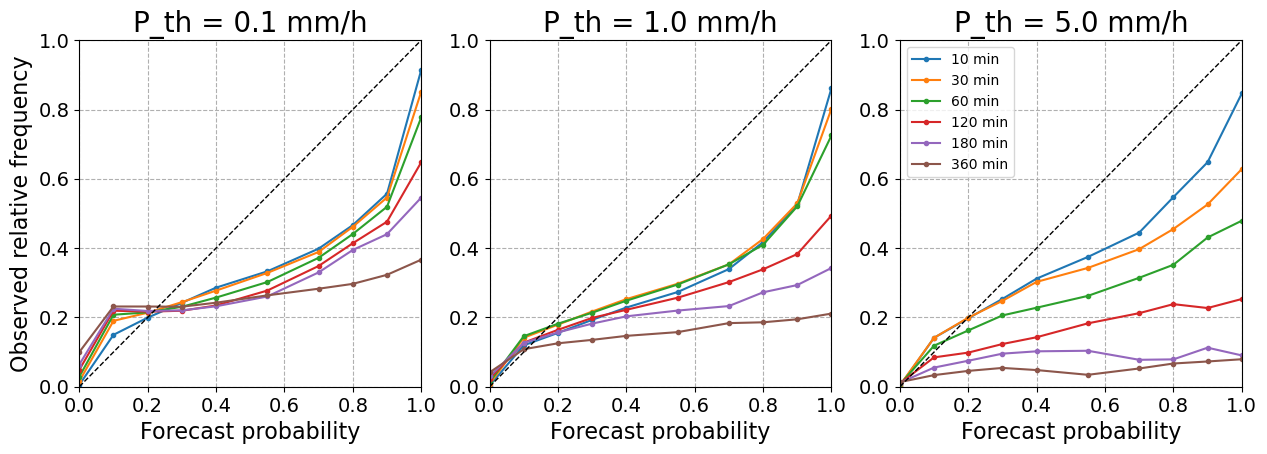

In [139]:
metric = 'rel'
relarray = pysteps_prob.swap_dims({"time":"leadtime"}).sel(leadtime=leadtimes)[metric].mean("startdate")

# To do: select only the smaller time window for showing this metric

slice_Pth = [0,2,3]
slice_Tl  = range(len(leadtimes)) #[0,1,2,3,4,5,6]

fig, axs = plt.subplots(1,3, figsize=(15, 4.5), facecolor='w', edgecolor='k')
# fig.subplots_adjust(hspace = .5, wspace=.001)

icont = 0
for i,_ in enumerate(slice_Pth):
    for j,_ in enumerate(slice_Tl):
        # ax = fig.add_subplot(1,3,icont)
        yy = relarray.isel(threshold=slice_Pth[i]).isel(leadtime=slice_Tl[j])
        xx = [0.,0.1,0.2,0.3,0.4,0.55,0.7,0.8,0.9,1.]
        #xx = relarray.forecast_probability
        axs[icont].plot(xx,yy,'.-', label=leadtimes[j].astype(str)[:-4])

    axs[icont].plot([0, 1], [0, 1], ls="--", color="k", linewidth=1)
    
    axs[icont].set_ylim([0, 1])
    axs[icont].set_xlim([0, 1])
    axs[icont].grid(True, linestyle='--')

    axs[icont].set_title((f'P_th = {relarray.isel(threshold=slice_Pth[i])["threshold"].values} mm/h'),fontweight="normal", size=20) 
    if icont == 0:
        axs[icont].set_ylabel('Observed relative frequency', fontsize = 16) # Y label
    else:
        axs[icont].set_ylabel('')
    axs[icont].set_xlabel('Forecast probability', fontsize = 16) # X label

    axs[icont].tick_params(axis='both', which='major', labelsize=14)
    
    icont += 1
plt.legend()
fig.savefig((f'{vali_path_plot}{"reldiag_pth_ldt"}_{icont}.png'), dpi=num_dpi, bbox_inches='tight')    
    
# plt.savefig((f'{vali_path_plot}{"reldiag_pth_ldt"}.png'), dpi=num_dpi, bbox_inches='tight')

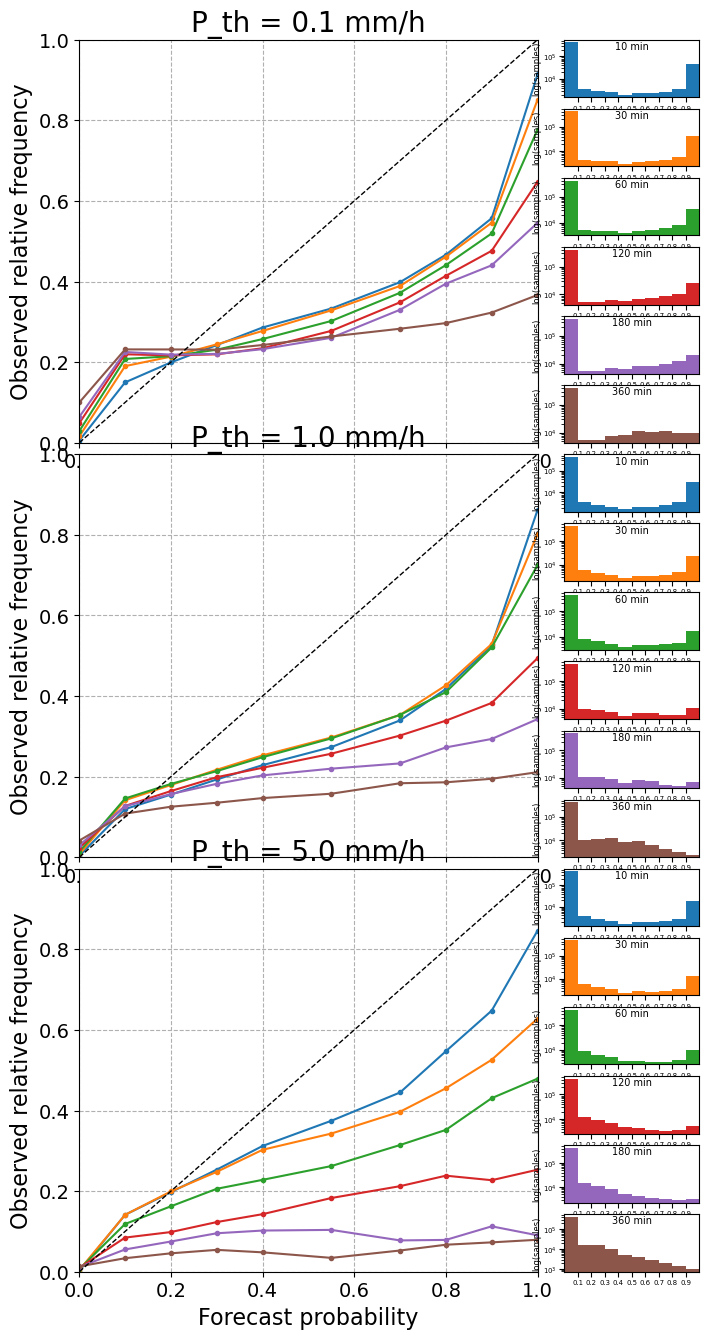

In [140]:
metric = 'rel'
bar_x = np.arange(0.05,1,0.1)
relarray = pysteps_prob.swap_dims({"time":"leadtime"}).sel(leadtime=leadtimes)[metric].mean("startdate")
hist = pysteps_prob.swap_dims({"time":"leadtime"}).sel(leadtime=leadtimes)['hist'].mean("startdate")

# To do: select only the smaller time window for showing this metric

slice_Pth = [0,2,3]
slice_Tl  = range(len(leadtimes)) #[0,1,2,3,4,5,6]
bin_edges = np.linspace(-0.000001,1.000001,11)

fig = plt.figure(figsize=(8, 16))
ax = GridSpec(18,4)
ax.update(wspace = 0.5, hspace = 0.5)
# plt.tight_layout(pad=3, w_pad=1.5, h_pad=1.0)
# gs = GridSpec(3, 2, width_ratios=[3, 1], wspace=0.1)
# fig = plt.figure()

# fig, axs = plt.subplots(3,1, figsize=(5, 15), facecolor='w', edgecolor='k')
# fig.tight_layout(pad=3.0)
# fig.subplots_adjust(hspace = 2.5, wspace=.001)

icont = 0
ibox, jbox = 0, 0
for i,_ in enumerate(slice_Pth):
    # axs = fig.add_subplot(gs[icont, 0])
    axs = plt.subplot2grid((18, 4), (icont*6, 0), colspan=3, rowspan=6)
    for j,_ in enumerate(slice_Tl):
        # ax = fig.add_subplot(1,3,icont)
        yy = relarray.isel(threshold=slice_Pth[i]).isel(leadtime=slice_Tl[j])
        xx = [0.,0.1,0.2,0.3,0.4,0.55,0.7,0.8,0.9,1.]
        #xx = relarray.forecast_probability
        if icont == 0:
            p = axs.plot(xx,yy,'.-', label=leadtimes[j].astype(str)[:-4])
        else:
            p = axs.plot(xx,yy,'.-')
        color = p[-1].get_color()

        # Plot sharpness diagram into an inset figure.
        if len(slice_Tl) == 1:
            if pysteps_rel[i, j].mean() <= 0.5:
                iax = plt.subplot2grid((18, 4), (icont*6+ibox, jbox+3))
                iax.yaxis.tick_right()
                iax.yaxis.set_label_position("right")
            else:
                iax = plt.subplot2grid((18, 4), (icont*6+ibox, jbox+3))
        else:
            iax = plt.subplot2grid((18, 4), (icont*6+ibox, jbox+3))
            ibox += 1
        
        iax.bar(bar_x,hist[i,j], color=color, width=0.1, log=True)
        iax.set_title(str(leadtimes[j])[:-4], y=1.0, pad=-7, size=7)
        iax.set_yscale("log")
        iax.set_xlabel("")
        iax.set_xticks(bin_edges)
        iax.set_xticklabels(["%.1f" % max(v, 1e-6) for v in bin_edges])
        iax.set_xlim(0.0, 1.0)
        if jbox == 0:
            iax.set_ylabel("log(samples)", size=6, labelpad=1)
        else:
            iax.set_ylabel("")
        iax.tick_params(axis="both", which="major", labelsize=5, pad=2)
        if ibox == 7:
            ibox = 0
            # jbox += 1

    axs.plot([0, 1], [0, 1], ls="--", color="k", linewidth=1)
    axs.set_ylim([0, 1])
    axs.set_xlim([0, 1])
    axs.grid(True, linestyle='--')
    axs.set_title((f'P_th = {relarray.isel(threshold=slice_Pth[i])["threshold"].values} mm/h'),fontweight="normal", size=20) 
    axs.set_ylabel('Observed relative frequency', fontsize = 16) # Y label
    if icont == len(slice_Pth)-1:
        axs.set_xlabel('Forecast probability', fontsize = 16) # X label
    else:
        axs.set_xlabel('')
    axs.tick_params(axis='both', which='major', labelsize=14)
    
    icont += 1
    ibox, jbox = 0, 0

# fig.legend(loc='lower right', ncols=2)
fig.savefig((f'{vali_path_plot}{"reldiag_pth_ldt_hist"}.png'), dpi=num_dpi, bbox_inches='tight')

# plt.savefig((f'{vali_path_plot}{"reldiag_pth_ldt"}.png'), dpi=num_dpi, bbox_inches='tight')

In [16]:
# # LEADTIME 20 min (= 4 timesteps)
# metric='rel'
# leadtimes = [np.timedelta64(i,"m") for i in [30,60,180,360]]
# _ = pysteps_prob.swap_dims({"time":"leadtime"}).sel(leadtime=leadtimes)[metric].mean("startdate").plot(
#     marker=".",
#     x='forecast_probability',
#     xlim=(0,1),
#     ylim=(0,1),
#     col='threshold',
#     row="leadtime",
# )


CRPS

Text(0, 0.5, 'CRPS')

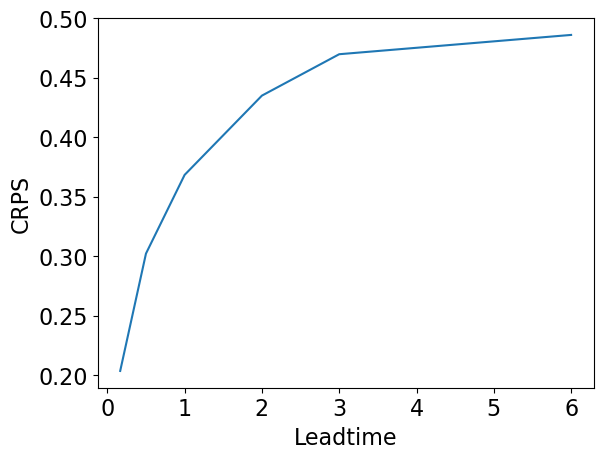

In [54]:
_ = pysteps_prob.assign_coords({"leadtime":(pysteps_prob.leadtime/np.timedelta64(1,"h"))}).crps.mean("startdate").plot(x="leadtime")
plt.xlabel('Leadtime')
plt.ylabel('CRPS')

# ax = plt.gca()
# _ = inca_prob.assign_coords({"leadtime":(inca_prob.leadtime/np.timedelta64(1,"h"))}).crps.sel(startdate=startdate_slice).mean("startdate").plot(x="leadtime")


BRIER

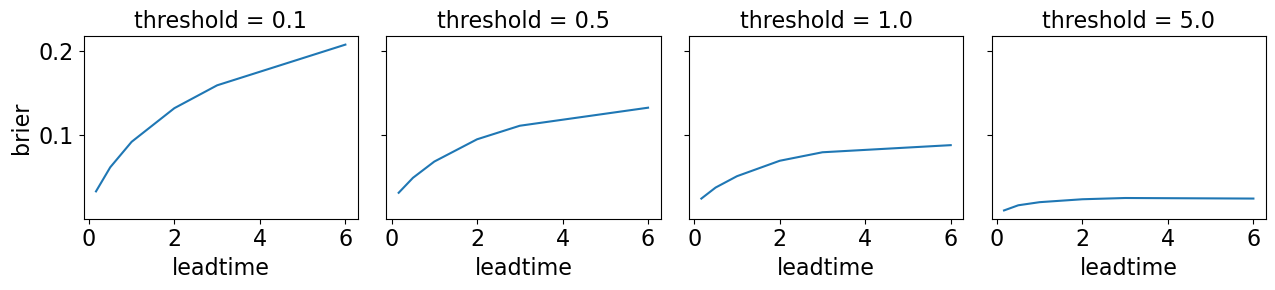

In [55]:
fg = pysteps_prob.assign_coords({"leadtime":(pysteps_prob.leadtime/np.timedelta64(1,"h"))}).brier.mean("startdate").plot(x="leadtime",col="threshold")
# for i,ax in enumerate(fg.axs.flatten()):
#     inca_prob.assign_coords({"leadtime":(inca_prob.leadtime/np.timedelta64(1,"h"))}).brier.sel(startdate=startdate_slice).isel(threshold=i).mean("startdate").plot(x="leadtime",ax=ax)

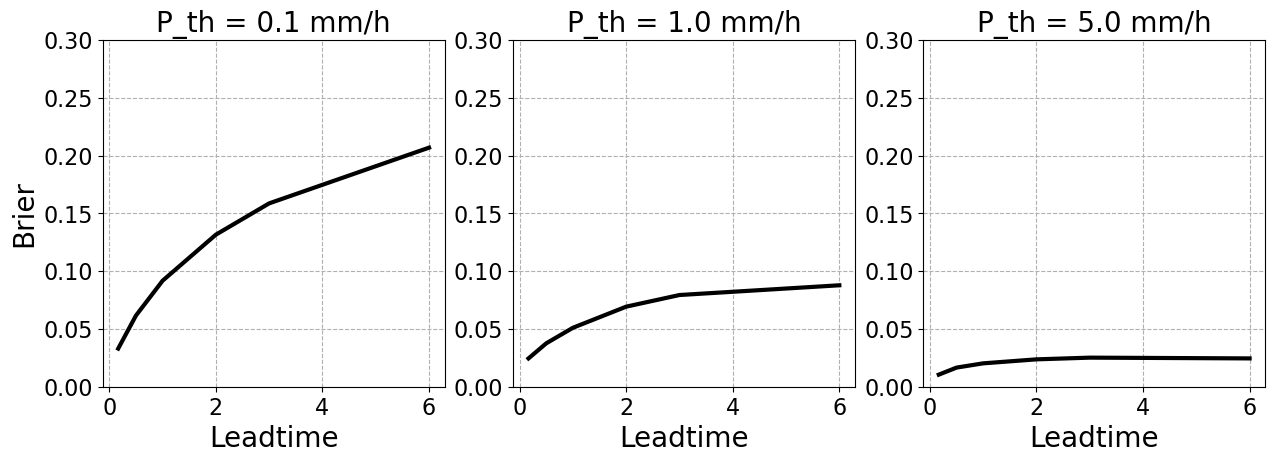

In [57]:
brierarray = pysteps_prob.assign_coords({"leadtime":(pysteps_prob.leadtime/np.timedelta64(1,"h"))}).brier.mean("startdate")
slice_Pth = [0,2,3]

fig, axs = plt.subplots(1,3, figsize=(15, 4.5), facecolor='w', edgecolor='k')
# fig.subplots_adjust(hspace = .5, wspace=.001)

icont = 0
for i,_ in enumerate(slice_Pth):
    yy = brierarray.isel(threshold=slice_Pth[i])
    xx = brierarray.leadtime
    axs[icont].plot(xx,yy,color="k",linewidth=3.0)

    axs[icont].set_ylim([0, 0.3])
    # axs[icont].set_xlim([0, 1.2])
    # axs[icont].set_xticks(np.arange(0., 1.2, 1.))
    axs[icont].grid(True, linestyle='--')

    axs[icont].set_title((f'P_th = {brierarray.isel(threshold=slice_Pth[i])["threshold"].values} mm/h'),fontweight="normal", size=20) 
    if icont == 0:
        axs[icont].set_ylabel('Brier', fontsize = 20.0) # Y label
    axs[icont].set_xlabel('Leadtime', fontsize = 20.0) # X label
    axs[icont].tick_params(axis='both', which='major', labelsize=16)
    
    icont += 1

plt.savefig((f'{vali_path_plot}{"brierscore_pth"}.png'), dpi=num_dpi, bbox_inches='tight')



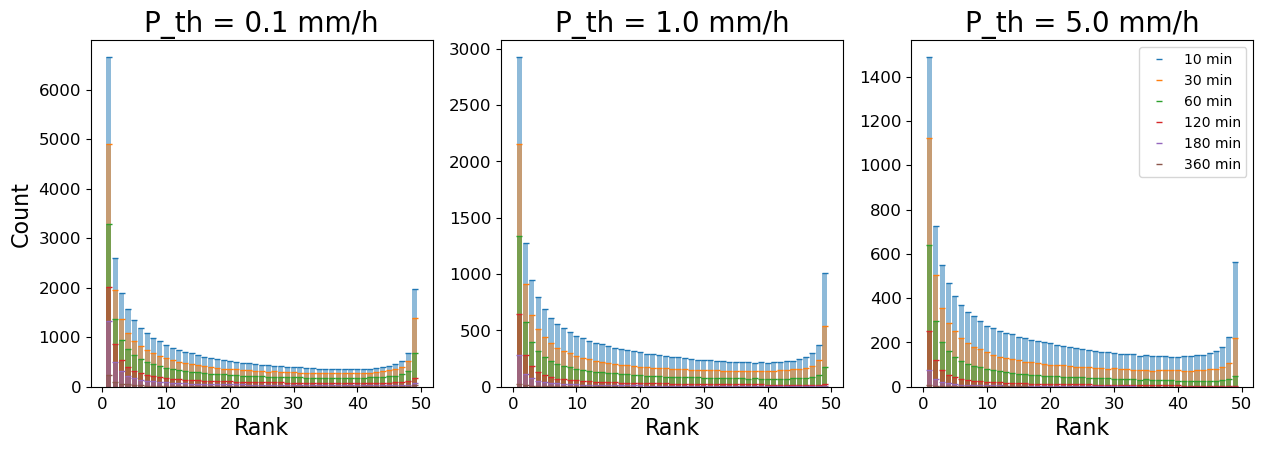

In [131]:
metric = 'rhist'
rhist = pysteps_prob.swap_dims({"time":"leadtime"}).sel(leadtime=leadtimes)[metric].mean("startdate")

slice_Pth = [0,2,3]
slice_Tl  = range(len(leadtimes)) #[0,1,2,3,4,5,6]

fig, axs = plt.subplots(1,3, figsize=(15, 4.5), facecolor='w', edgecolor='k')
# fig.subplots_adjust(hspace = .5, wspace=.001)

icont = 0
for i,_ in enumerate(slice_Pth):
    for j,_ in enumerate(slice_Tl):
        # ax = fig.add_subplot(1,3,icont)
        rhist[i,j].plot(marker='_', ms=4, ls='', label=leadtimes[j].astype(str)[:-4], ax=axs[icont])
        axs[icont].bar(rhist['rank'], rhist[i,j], alpha=0.5)
    
    axs[icont].set_title((f'P_th = {relarray.isel(threshold=slice_Pth[i])["threshold"].values} mm/h'),fontweight="normal", size=20) 
    if icont == 0:
        axs[icont].set_ylabel('Count', fontsize = 16) # Y label
    else:
        axs[icont].set_ylabel('')
    axs[icont].set_xlabel('Rank', fontsize = 16) # X label
    # axs[icont].set_xticks(rhist['rank'].values.astype(int))
    axs[icont].tick_params(axis='both', which='major', labelsize=12)
    icont += 1

plt.legend()
fig.savefig((f'{vali_path_plot}{"rankhist_pth_ldt"}_{icont}.png'), dpi=num_dpi, bbox_inches='tight')    
    
# plt.savefig((f'{vali_path_plot}{"reldiag_pth_ldt"}.png'), dpi=num_dpi, bbox_inches='tight')

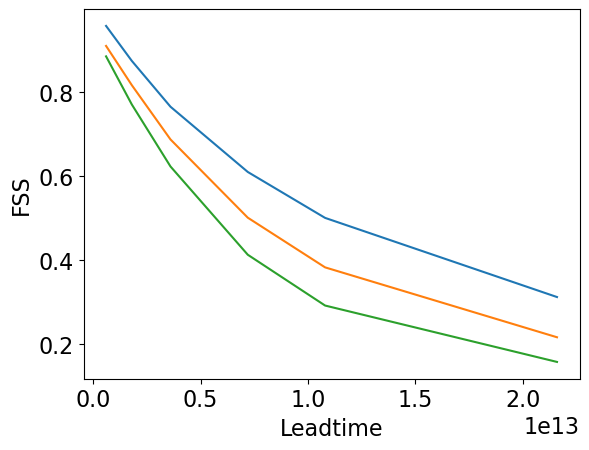

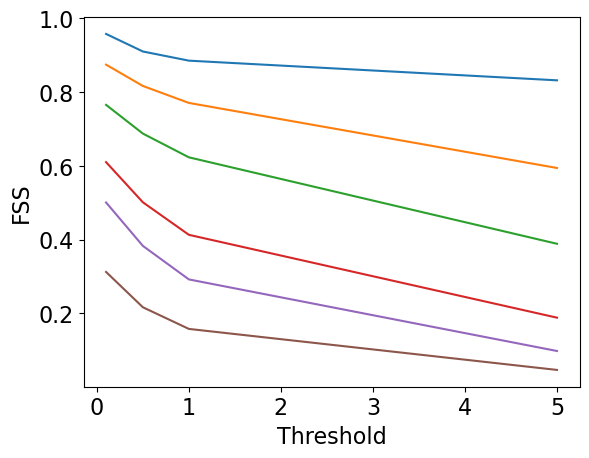

In [63]:
metric = 'fss'
fss = pysteps_prob.swap_dims({"time":"leadtime"}).sel(leadtime=leadtimes)[metric].mean("startdate").mean("ens_number")
for i,_ in enumerate(slice_Pth):
    fss[i,:].plot()
    plt.title('')
    plt.xlabel('Leadtime')
    plt.ylabel('FSS')
plt.show()
for j,_ in enumerate(slice_Tl):
    fss[:,j].plot()
    plt.title('')
    plt.xlabel('Threshold')
    plt.ylabel('FSS')
plt.show()

In [25]:
pysteps_cont

<xarray.Dataset> Size: 139kB
Dimensions:                       (startdate: 6, threshold: 4, time: 12,
                                   ens_number: 10, observations_category: 2,
                                   forecasts_category: 2)
Coordinates:
  * threshold                     (threshold) float64 32B 0.1 0.5 1.0 5.0
    observations_category_bounds  (observations_category) <U10 80B ...
    forecasts_category_bounds     (forecasts_category) <U10 80B ...
  * observations_category         (observations_category) int32 8B 1 2
  * forecasts_category            (forecasts_category) int32 8B 1 2
  * time                          (time) timedelta64[ns] 96B 00:05:00 ... 01:...
Dimensions without coordinates: startdate, ens_number
Data variables:
    table                         (startdate, threshold, time, ens_number, observations_category, forecasts_category) int64 92kB ...
    ets                           (startdate, threshold, time, ens_number) float64 23kB ...
    csi                           (startdate, threshold, time, ens_number) float64 23kB ...

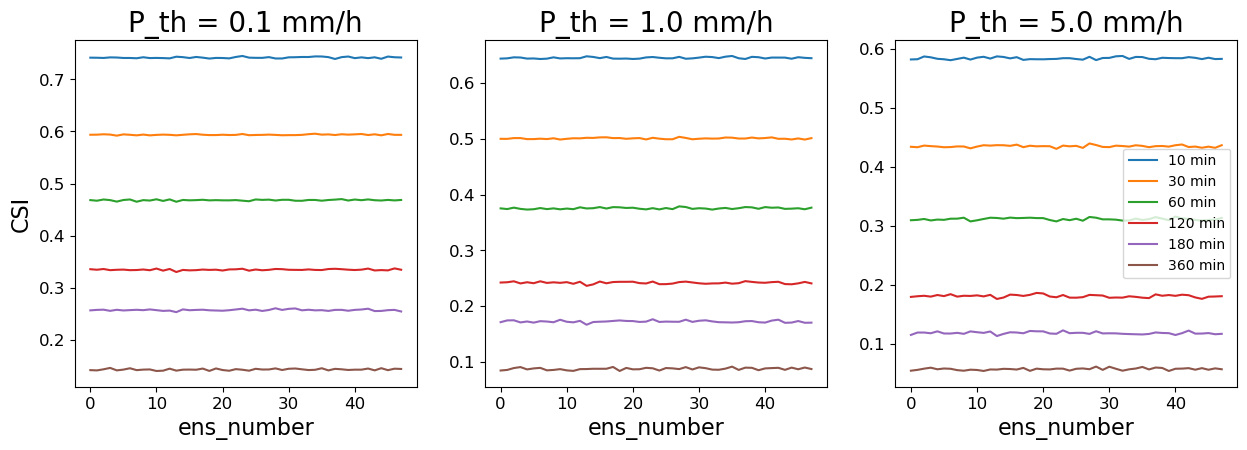

In [64]:
metric = 'csi'
# csi = pysteps_cont.sel(time=leadtimes)[metric].mean("ens_number)
csi = pysteps_cont.sel(time=leadtimes)[metric].mean("startdate")

slice_Pth = [0,2,3]
slice_Tl  = range(len(leadtimes)) #[0,1,2,3,4,5,6]

fig, axs = plt.subplots(1,3, figsize=(15, 4.5), facecolor='w', edgecolor='k')
# fig.subplots_adjust(hspace = .5, wspace=.001)

icont = 0
for i,_ in enumerate(slice_Pth):
    for j,_ in enumerate(slice_Tl):
        # ax = fig.add_subplot(1,3,icont)
        csi[i,j].plot(label=leadtimes[j].astype(str)[:-4], ax=axs[icont])
        # csi[:,i,j].plot(label=leadtimes[j].astype(str)[:-4], ax=axs[icont])
        # axs[icont].bar(csi['rank'], rhist[i,j], alpha=0.5)
    
    axs[icont].set_title((f'P_th = {csi.isel(threshold=slice_Pth[i])["threshold"].values} mm/h'),fontweight="normal", size=20) 
    if icont == 0:
        axs[icont].set_ylabel('CSI', fontsize = 16) # Y label
    else:
        axs[icont].set_ylabel('')
    # axs[icont].set_xlabel('Member', fontsize = 16) # X label
    # axs[icont].set_xticks(csi['ens_number'].values.astype(int))
    # axs[icont].set_xticklabels((csi['ens_number'].values+1).astype(int))
    axs[icont].tick_params(axis='both', which='major', labelsize=12)
    icont += 1

plt.legend()
fig.savefig((f'{vali_path_plot}{"rankhist_pth_ldt"}_{icont}.png'), dpi=num_dpi, bbox_inches='tight')
    
# plt.savefig((f'{vali_path_plot}{"reldiag_pth_ldt"}.png'), dpi=num_dpi, bbox_inches='tight')

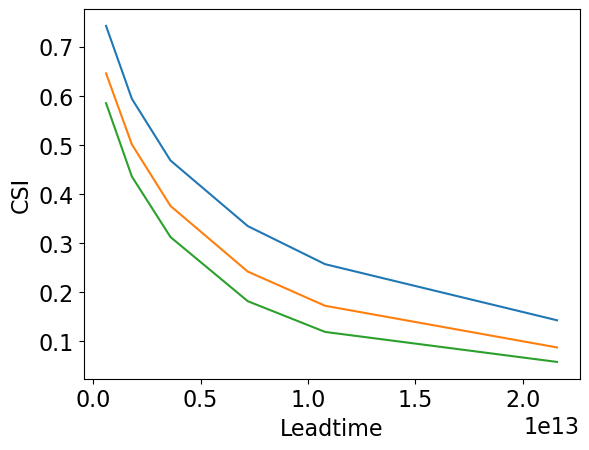

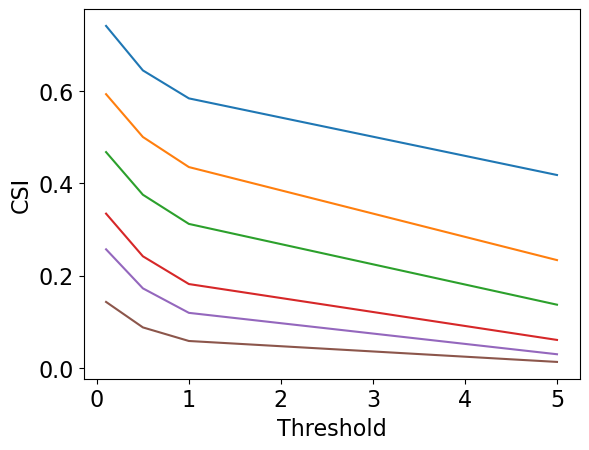

In [65]:
metric = 'csi'
csi = pysteps_cont.sel(time=leadtimes)[metric].mean("startdate").mean("ens_number")
for i,_ in enumerate(slice_Pth):
    csi[i,:].plot()
    plt.title('')
    plt.xlabel('Leadtime')
    plt.ylabel('CSI')
plt.show()
for j,_ in enumerate(slice_Tl):
    csi[:,j].plot()
    plt.title('')
    plt.xlabel('Threshold')
    plt.ylabel('CSI')
plt.show()

In [133]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current Axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar

import matplotlib
def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

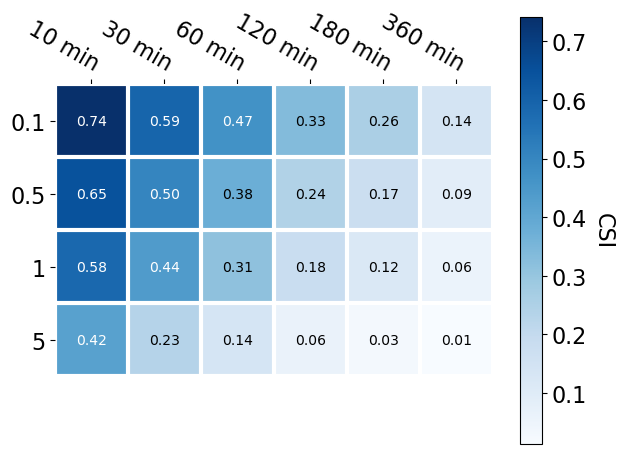

In [136]:
metric = 'csi'
csi = pysteps_cont.sel(time=leadtimes)[metric].mean("startdate").mean("ens_number")
threshold = [0.1,0.5,1,5]
leadtime = [str(lt)[:-4] for lt in leadtimes]

fig, ax = plt.subplots()
im, cbar = heatmap(csi, threshold, leadtime, ax=ax,
                   cmap="Blues", cbarlabel="CSI")
texts = annotate_heatmap(im, valfmt="{x:.2f}")
fig.tight_layout()
fig.savefig((f'{vali_path_plot}csi_pth_ldt.png'), dpi=num_dpi, bbox_inches='tight')
plt.show()

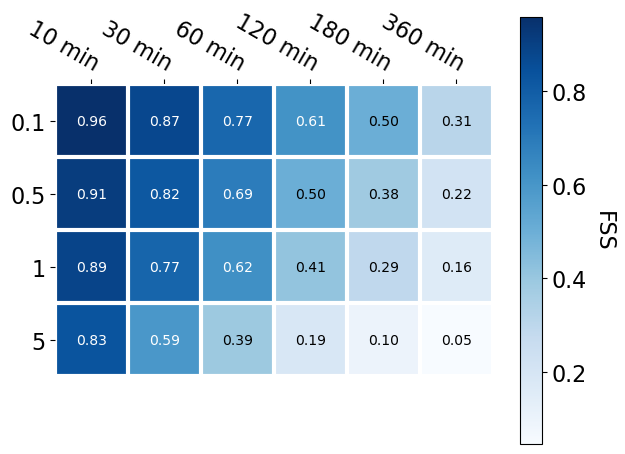

In [137]:
metric = 'fss'
fss = pysteps_prob.swap_dims({"time":"leadtime"}).sel(leadtime=leadtimes)[metric].mean("startdate").mean("ens_number")
threshold = [0.1,0.5,1,5]
leadtime = [str(lt)[:-4] for lt in leadtimes]

fig, ax = plt.subplots()
im, cbar = heatmap(fss, threshold, leadtime, ax=ax,
                   cmap="Blues", cbarlabel="FSS")
texts = annotate_heatmap(im, valfmt="{x:.2f}")
fig.tight_layout()
fig.savefig((f'{vali_path_plot}fss_pth_ldt.png'), dpi=num_dpi, bbox_inches='tight')
plt.show()